# Logistic Regression example
Using a Fish dataset we will predict the Species (target value) using given parameters of fish.

# Imports and reading data

In [2]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

# for visualisation
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt

# setting up plotly
init_notebook_mode(connected=True)  # for notebooks
from plotly.offline import iplot
# For offline use
cf.go_offline()

# for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\kvjai\AppData\Local\Temp\ipykernel_18248\2351449168.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# defining a url for dataset which is on a Github repo
dataset_url = "https://raw.githubusercontent.com/harika-bonthu/02-linear-regression-fish/master/datasets_229906_491820_Fish.csv"

# reading data 
df = pd.read_csv(dataset_url)
df.shape
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# checking unique values of Target
df['Species'].unique()

# checking null values
df.isnull().sum()
     


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# Data Visualisation

In [5]:
df['Species'].iplot(kind='hist', colors='blue')


# Preparing Data for model

In [6]:
# defining features and target variables
X = df.iloc[:, 1:]
y = df.loc[:, 'Species']

<h3>Scaling input featrues using MinMaxScaler</h3>

In [7]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

<h3>Label encoding target variable</h3>

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

<h3>Splitting into Train-Test</h3>

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model coding

In [10]:
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)

LogisticRegression()

# Prediction

In [11]:
y_pred = clf.predict(X_test)

# Checking accuracy

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.25%


# Confusion Matrix
A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions.

The matrix displays the number of instances produced by the model on the test data.

- True positives (TP): occur when the model accurately predicts a positive data point.
- True negatives (TN): occur when the model accurately predicts a negative data point.
- True positives (FP): occur when the model predicts a positive data point incorrectly.
- False negatives (FN): occur when the model mispredicts a negative data point.

Text(0.5, 1.0, 'Confusion Matrix')

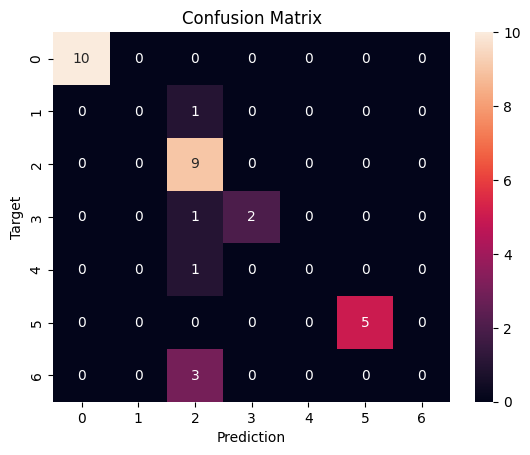

In [13]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00         1
           2       0.60      1.00      0.75         9
           3       1.00      0.67      0.80         3
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         5
           6       0.00      0.00      0.00         3

    accuracy                           0.81        32
   macro avg       0.51      0.52      0.51        32
weighted avg       0.73      0.81      0.75        32



# Classification report explanation

- Precision: Percentage of correct positive predictions relative to total positive predictions.
- Recall: Percentage of correct positive predictions relative to total actual positives.
- F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.<br>
F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

